# Strategic Interactions

[Wolfram Barfuss](https://wbarfuss.github.io) | [University of Bonn](https://www.uni-bonn.de) | 2024/2025 <br>
▶ **Complex Systems Modeling of Human-Environment Interactions**

In [1]:
#| echo: false
from IPython.display import IFrame
def iframe(url, width="100%", height=450, extras=None):
    return IFrame(url, width, height, extras)

## Motivation | **Collective action for sustainability**

Consider the following questions:

* Do you think climate change is a significant problem the world needs to address?
* Do you think the world has been trying?
* Do you think the world has succeeded?


::: {.content-visible when-format="html"}

Please enter your views below.

In [3]:
#| echo: false
iframe("https://ars.particify.de/p/57584395/series/03.02-01-ClimateChange/1")

:::

Scott Barrett asked these questions at the beginning of a talk, which I can highly recommend watching. The talk is called [Climate Change Diplomacy: a Most Dangerous Game](https://www.youtube.com/watch?v=5GO0ZS2KkPY) and is given at the London School of Economics.

The typical answers to these questions raise the point of **why it is so difficult to succeed in stopping climate change despite recognizing the problem and trying to solve it.**

**The outcome depends on all!** Carbon dioxide (CO2) is the most prevalent greenhouse gas driving global climate change. CO2 from different sources (fossil fuels, burned biomass, land ecosystems, oceans) is being added to Earth's atmosphere from various locations over the globe. Then, it mixes relatively fast in the atmosphere, i.e., the consequences for a region do not depend on how much that region emits but on the overall emissions.

![This visualization from [NASA](https://svs.gsfc.nasa.gov/5110) shows the CO2 added to Earth's atmosphere over 2021, split into four major contributors: fossil fuels in orange, burning biomass in red, land ecosystems in green, and the ocean in blue. The dots on the surface also show how green land ecosystems and the ocean in blue absorb atmospheric carbon dioxide. Though the land and oceans are each carbon sinks in a global sense, individual locations can be sources at different times.](images/03.02-Atmosphere.dio.png)

::: {.content-visible when-format="html"}

In [4]:
#| echo: false
iframe("https://www.youtube-nocookie.com/embed/Q_93pLMA4pM?si=LMwqLfiMJreDB27i")

:::

 **To stabilize the climate, (net) emissions have to go to zero**.

 ![Linear damages of climate change](images/03.02-LinearDamages.dio.png)

While the climate is the most discussed example, the collective action problem extends to the whole **planetary commons**.

### **Advantages** of game theory

**In this lecture**, we introduce the basics of mathematical game theory to uncover the underlying mechanisms of strategic interactions. We will see how the behavior of individuals can lead to collective outcomes that are not in the interest of any individual. We will also discuss possible mechanisms and variations of the situation that help to overcome these challenges and will acknowledge the limitations of these variations.

A **mathematical game** describes an action situation where an **outcome** relevant to an individual **depends on** at least one **other actor**. This is why we speak of **inter**actions instead of only actions of a single-agent action situation. The **strategic** aspect comes into play when the actors are aware of the interdependence and can anticipate the actions of others.

### Learning goals

After this lecture, students will be able to:

* Apply game theory to model multi-agent action situations
* Resolve games by finding Nash equilibria
* Describe the dimensions of a social dilemma
* Explain two special kinds of games: *agreement games* and *threshold public goods*, and how they relate to the dimensions of a social dilemma.

## Game theory

> Life is a game. At least in theory.

In [5]:
import numpy as np  
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from ipywidgets import interact, fixed

import matplotlib.style as style; style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (7.8, 2.5); plt.rcParams['figure.dpi'] = 300
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]  # get the first color of the default color cycle
plt.rcParams['axes.facecolor'] = 'white'; plt.rcParams['grid.color'] = 'gray'; plt.rcParams['grid.linewidth'] = 0.25; 

Game theory in itself is diverse. Here, we focus on **normal-form games** with the following elements.

* A finate set of $N$ agents $\mathcal I = \{2,\dots, N\}$ participating in an interaction.
* For each agent $i\in\mathcal I$, a discrete set of **options** or **actions** $\mathcal A^i = \{A^i_1, \dots, A^i_M\}$.
    * Let's denote the joint action set by $\boldsymbol{\mathcal A} = \mathcal A^1 \times \dots \times A^N$.
    * An action profile $\boldsymbol a = (a^1,\dots,a^N) \in \boldsymbol{\mathcal A}$ is a joint action of all agents.
* For each agent $i\in\mathcal I$, a **welfare**, **reward** or **payoff** function $R^i: \boldsymbol{\mathcal A} \rightarrow \mathbb R$.
    * $R^i(\boldsymbol a)$ is the welfare agent $i$ receives when all agents chose $\boldsymbol a = (a^1,\dots,a^N) \in \boldsymbol{\mathcal A}$
* The agent's **policy** or **strategy** $x^i: \mathcal A^i \rightarrow [0,1]$.
    * $x^i(a^i)$ is the probability agent $i$ chooses action $a^i$.
    * A strategy is called *pure* if it chooses actions deterministically. If it is not *pure*, it is called *mixed* instead.


### Let's play

* You are given two choices: **abate** climate change or continue to **pollute** the atmosphere.
* You gain 100 Euros (of averated damages) for each person that chooses *abate*.
* If you choose *abate*, you must pay 250 Euros.

What would you choose?

::: {.content-visible when-format="html"}

In [6]:
#| echo: false
iframe("https://ars.particify.de/p/57584395/series/03.02-02-Game1")

:::

Would you have chosen differently if the action had been labeled **red** and **blue**?

The agents or actors in this game are all participants in this questionnaire.
The actions are *abate* and *pollute*. 
The payoff is a given in (hypothetical) money. 
The strategies are the deterministic choice of either *abate* or *pollute*.

### Mathematical model

Let us model the reward functions of this normal-form game in general terms. We have $N$ agents, the players of the game, each with two actions $\mathsf{A}$ or $\mathsf{P}$, the choices they can make. 

Each abating actor brings a **benefit** $b$ (of averted damages) to all actors at an **individual cost** $c$.

From the perspective of a focal agent, let $N_\mathsf{A}$ be the number of all other actors abating. The rewards are then
    
* for a polluting actor: $R_\mathsf{P}(\mathbf a) = N_\mathsf{A} b$ 
* for an abating actor: $R_\mathsf{A}(\mathbf a) = (N_\mathsf{A} + 1) b - c$ 

We visualize these payoffs as a function of the number of other abating actors.

In [7]:
def plot_payoffs(N, b, c, ax=None):
    Na_other = np.arange(0, N)
    bA = (Na_other+1)*b - c
    bP = Na_other*b

    _, a = plt.subplots() if ax is None else (None, ax)
    a.plot(Na_other, bA, '.-', label='Abate')
    a.plot(Na_other, bP, '.-', label='Pollute')
    a.legend(); a.set_xlabel('Number of other actors abating'); a.set_ylabel('Payoff')

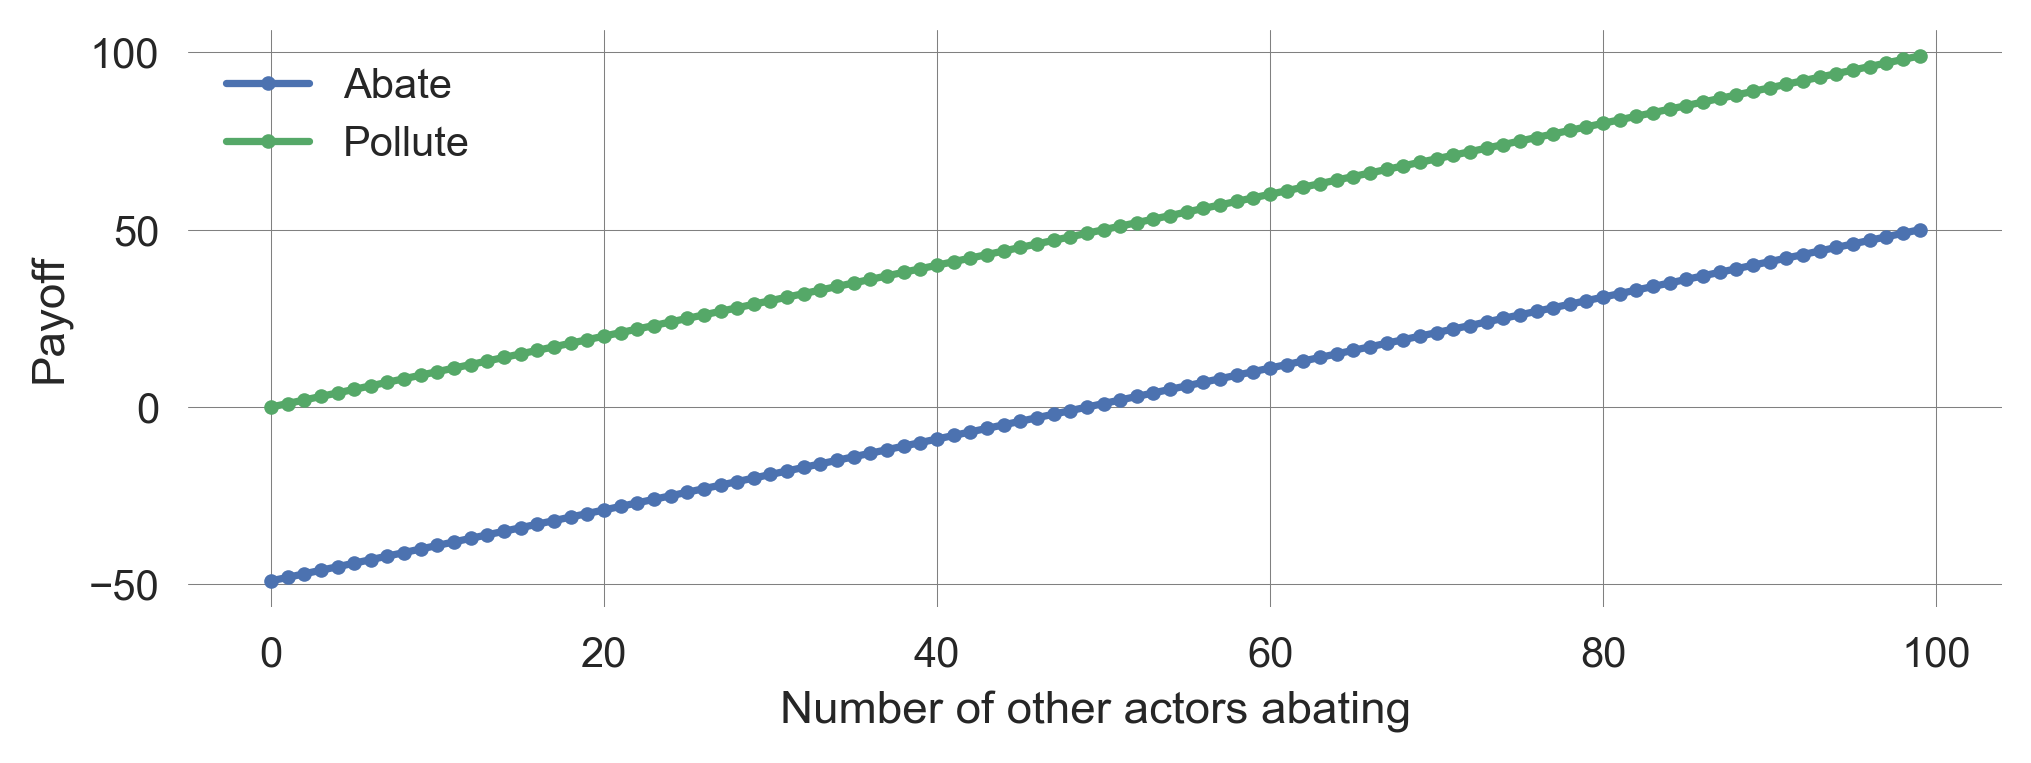

In [8]:
plot_payoffs(N=100, b=1, c=50)

We observe that the reward of *polluting* is always higher than that of *abating*, regardless of the number of other actors abating. 


Thus, regardless of what the others do, every individual is incentivized to choose *pollute*. Hence, for every individual $i$, *pollute* is a **dominant strategy**.

Definition | **Dominant strategy**

Let $\boldsymbol x = (x^i, \boldsymbol x^{-i})$ be a joint strategy, where $x^i$ is actor $i$'s strategy, and $\boldsymbol x^{-i}$ is the joint strategy of all other actors.

Actor $i$ has a *dominant strategy*, $x^i_D$, iff

$$R^i(x^i_D,  {\boldsymbol x}^{-i}) \geq R^i(\tilde x^i, \tilde {\boldsymbol x}^{-i})$$

for all possible other strategies $\tilde x^i, \tilde {\boldsymbol x}^{-i}$.

Thus, when all actors choose *pollute*, no actor has an incentive to deviate from this strategy. This is called a **Nash equilibrium**.

### **Nash equilibirum**

#### Definition

Let $\boldsymbol x = (x^i, \boldsymbol x^{-i})$ be a joint strategy, where $x^i$ is agent $i$'s strategy and $\boldsymbol x^{-i}$ is the joint strategy of all other agents.

A joint strategy $\boldsymbol x_*$ is a Nash-equilibrium when no agent can benefit from changing its strategy unilaterally,

$$ R^i(x^i_*, \boldsymbol x_*^{-i}) \geq R^i(\tilde x^i, \boldsymbol x_*^{-i})$$

for all agents $i$ and all other strategies $\tilde X^i$.

In 1950, John Nash showed (in a one-pager) that such an equilibrium always exists for games with *any number of (finite) actors with a finite number of actions* and *any type of payoffs* (beyond zero-sum games).

**DeeDive** | Nash's equilibrium produces the same solution as von Neumann and Morgenstern's minimax in the two-player zero-sum game. But while von Neumann and Morgenstern had struggled to extend the minimax solution beyond two-player zero-sum games in their 600-page book, Nash's solution could be extended to any other case! I recommend the following blog post [Time for Some Game Theory - by Lionel Page](https://www.optimallyirrational.com/p/time-for-some-game-theory) for an intuitive introduction to game theory.

#### Interpretation
There is much confusion about **how to interpret a Nash equilibrium**, considering the question of how actors would be able to play a Nash equilibrium in a one-shot interaction. We will briefly discuss two interpretations: the *rationalistic* and the *learning* interpretation.

In the **rationalistic interpretation**, rational players would mentally simulate the various ways the game could unfold and choose a Nash equilibrium. However, when faced with non-trivial strategic situations for the first time, people typically fail to play a Nash equilibrium of the game. When there is more than one equilibrium, this interpretation cannot say which one an actor would choose (This is also known as the **equilibrium selection problem**).  

In the **learning interpretation**, actors learn to play a Nash equilibrium through experience from repeated interactions over time. Learning here is understood in the broadest sense possible. It could be through imitation, trial and error, or even (cultural or genetic) evolution [@HoffmanYoeli2022]. However, we will not explicitly model the learning process in this lecture and the whole part on *target equilibria*. This will be the main topic of the last part of this course.

#### Movie time
The movie *A Beautiful Mind* portrays John Nash, the inventor of the Nash equilibrium. The [Bar Scene](https://www.youtube.com/watch?v=LJS7Igvk6ZM) is the moment in the film where Nash experiences the revelation of his equilibrium concept.

::: {.content-visible when-format="html"}

In [9]:
#| echo: false
iframe("https://www.youtube-nocookie.com/embed/LJS7Igvk6ZM?si=WkTyjAwkVvKvaHxf")

:::

Is the solution of the game Nash advocates for in the [clip](https://www.youtube.com/watch?v=LJS7Igvk6ZM) a Nash equilibrium?

::: {.content-hidden unless-profile="interactive"}

In [10]:
#| echo: false
iframe("https://ars.particify.de/p/57584395/series/03.02-03-BarScene")

:::

### Social dilemma

In fact, the bar scene from *A Beautiful Mind* is a good example of a social dilemma. 

**A social dilemma is a situation where all actors have an incentive to behave selfishly.**

**However, everyone would be better off if everyone would behave cooperatively.**


The game of abating and polluting is also a social dilemma for some values of the parameters $b$ and $c$.

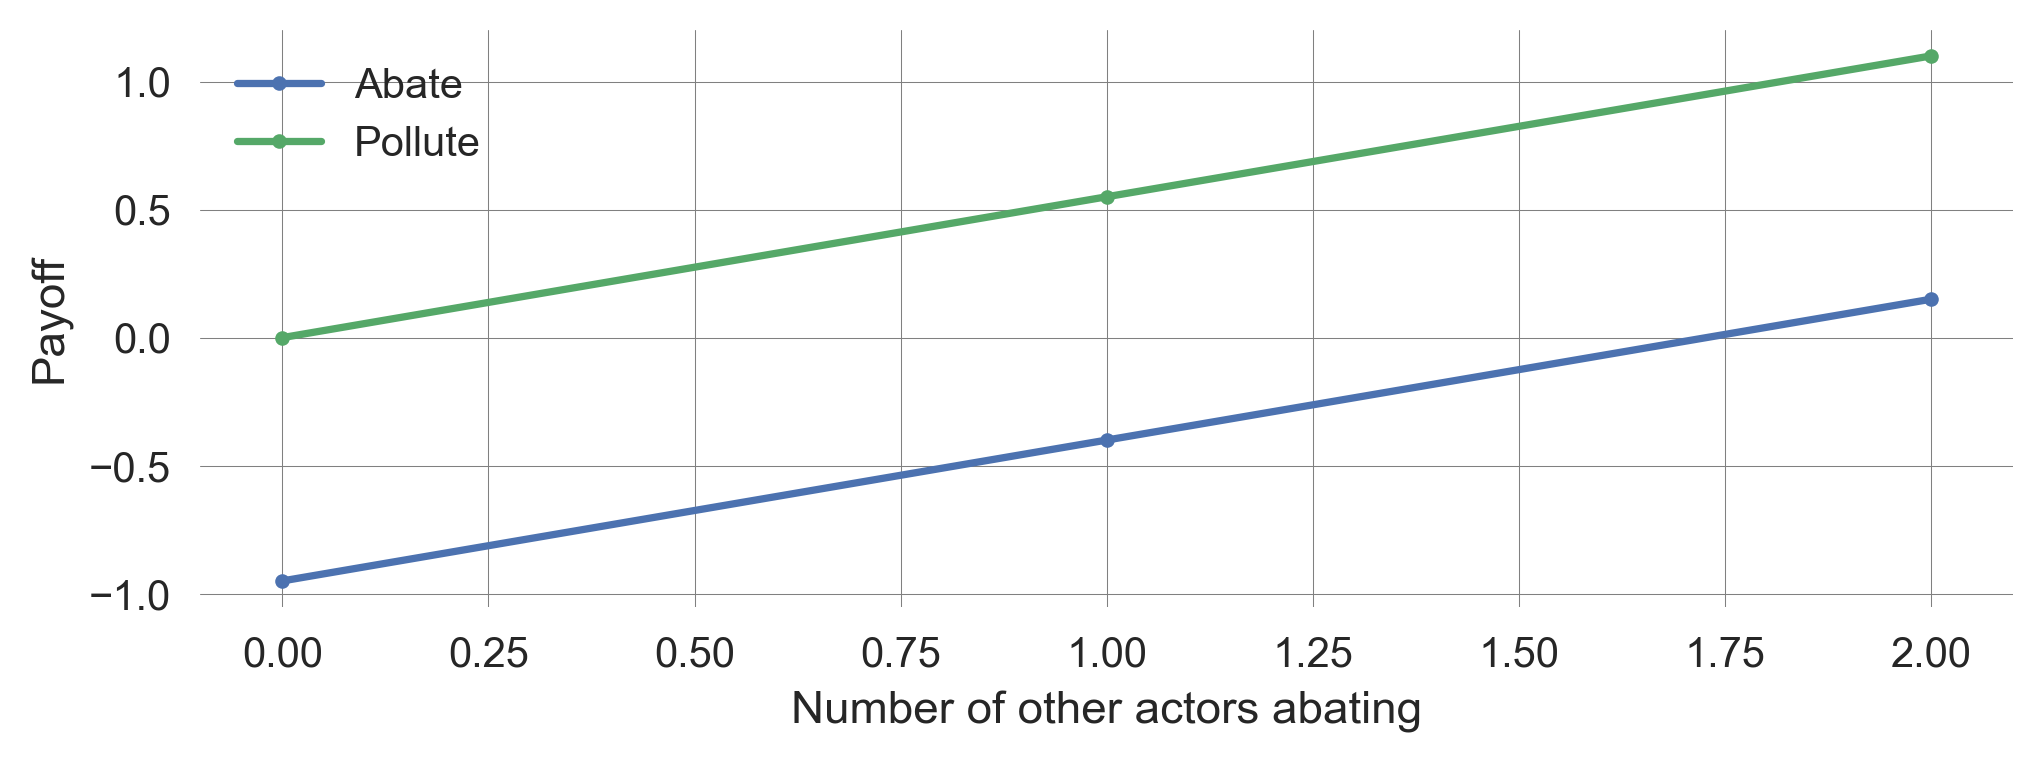

In [11]:
plot_payoffs(N=3, b=0.55, c=1.5)

As long as the cost of abating is greater than the benefit, $b<c$, the unique Nash equilibrium is that all actors pollute.

However, when the benefit of abating times the number of actors is higher than the cost $c<bN$, all actors would be better off if all actors abate.

**When both conditions are met, $b<c<bN$, the game is a social dilemma.**

Note, when $c>bN$, all actors *polluting* is the unique Nash equilibrium and the social optimum. Everyone is better off when all actors pollute.

This simple model helps to explain why situations with many actors $N$ can be more prone to be social dilemmas. When abating benefits everyone, independent of how many actors are involved, having many actors makes the situation likely to be a social dilemma. Independent of how large the cost $c$ may be, we simply have to increase $N$, such that $c<bN$. The condition that the benefits $b$ are independent of $N$ refers to the **public good** nature of the benefits. The benefits of having an intact and healthy planet with maintenance and regulating ecosystem services serve everyone, regardless of how many. They are so-called non-rivalrous. Other services of Nature are rivalrous, e.g., the fish in the ocean.

## Dimensions of a social dilemma

Let us dissect a social dilemma along two dimensions:

* the **greed** $G$ to exploit others, and
* the **fear** $F$ of being exploited by others.

For two actors that must face the decision between *abate* or *pollute*, we can summarize the payoffs in a matrix,
$$
\begin{array}{c|cc}
\text{} & \color{blue}{\mathsf{Abate}} & \color{blue}{\mathsf{Pollute}} \\
\hline
\color{red}{\mathsf{Abate}} & {\color{red}{1}} \ | \ {\color{blue}{1}} & {\color{red}{-1-F}} \ | \ {\color{blue}{+1+G}} \\
\color{red}{\mathsf{Pollute}} & {\color{red}{+1+G}} \ | \ {\color{blue}{-1-F}} & {\color{red}{-1}} \ | \ {\color{blue}{-1}} \\
\end{array}
$$.

Depending on whether the greed $G$ and fear $F$ are positive or negative, we can distinguish four types of games @fig-social-dilemma-dimensions.

![Dimensions of a social dilemma with ordinal payoffs and Nash equilibira shown in boxes.](images/03.02-SocialDilemmaDimensions.dio.png){#fig-social-dilemma-dimensions}

In @fig-social-dilemma-dimensions, the payoff values are ordinal, meaning that only their order, $3>2>1>0$, is considered of relevance.

#### **Case 1 | Tragedy** ($G>0, F>0$).
When actors are greedy to exploit others and fear being exploited by others, the game is a tragedy. Regardless of what others do, each agent has an incentive to pollute. Thus, the **Nash equilibrium** is that **all actors pollute**. The tragedy is that all actors would be better off if all actors abate. Another common name for this situation is the *Prisoner's dilemma*.

#### **Case 2 | Divergence** ($G>0, F<0$).
When actors are greedy to exploit others but do not fear being exploited by others, the actors are in a situation of divergence. When enough other actors *pollute*, individual incentives regard *abate* better than *pollute*. Thus, in the two-actor case, both **(abate, pollute)** and **(pollute, abate)** are **Nash equilibria**, where the polluting actor receives more than the abating one (as long as $F>-(G+2)$). This is a situation of **inequality emerging** despite both actors being identical. It also induces a **first-mover advantage**, as the first actor to choose *pollute* will receive more reward than the *abating* actor. We call this situation **divergence** since the collective remains divided and only partial sustainability is achieved.  Other popular names are *chicken*, *hawk-dove*, *snow-drift* describing different stories around the situation.

#### **Case 3 | Coordination** ($G<0, F>0$).

When actors are not greedy to exploit others but fear being exploited by others, they are in a situation of coordination. What is better for an individual mirrors what the others do. Thus, both **(abate, abate)** and **(pollute, pollute)** are **Nash equilibria**. In both equilibria, both agents are equally well off, but it depends on which of the two equilibria the actors coordinate. The agents are better off in *(abate, abate)* than in *(pollute, pollute)*. However, coordination may still be difficult to achieve, e.g., because of anonymity, a lack of communication, or false beliefs. Nevertheless, **turning a tragedy into a coordination game is a common mechanism to resolve the social dilemma**. Another popular name for this situation is the *stag-hunt* game. 


#### **Case 4 | Comedy** ($G<0, F<0$).

When there is neither greed to exploit others nor fear to be exploited by others, the actors are in a situation of comedy. Regardless of what others do, each agent has an incentive to abate. Thus, the joint strategy **(abate, abate)** is the only **Nash equilibrium**. Since individual and collective interests point to the same solution, we call this the **comedy** of the commons [@OstromEtAl2002]. The *Harmony* game is another common name for this situation.

### Limitations

We assumed that the **actors** were **anonymous**. However, actors are often not anonymous, especially in the governance of local commons. They know each other and can communicate and reciprocate [@OstromEtAl2002; @Nowak2006; @AnderiesJanssen2016]. This can help overcome the social dilemma. We will discuss and model this in the last part of the course.

We also did not discuss any mechanisms that let one or more of these games (or incentive regimes) emerge. We will discuss two such broad mechanisms in the remainder of this chapter: **international agreements** and **threshold public goods**.

## International Agreements

Let us revisit our climate commons dilemma from above. Each abating actor brings a **benefit** $b=100$ EUR (of averted damages) to all actors at an **individual cost** $c=250$ EUR. One way to resolve this social dilemma could be through an agreement. The **actors could agree to abate**. In the following, we will model this additional game layer, highlighting its potential and limitations.

### Let's play

We assume that **an agreement has already been negotiated**. If you sign the agreement, you must choose *abate*. However, the agreement comes only into force if there are at least three signatories.

You gain 100 Euros for each person who chooses *abate*. If you choose *abate*, you have to pay 250 Euros

You have to make three choices:

1) whether you **sign** or **not sign** the agreement
2) what you choose if there are not enough signatories: **abate** or **pollute**
3) what you choose if you did not sign the agreement: **abate** or **pollute**

::: {.content-visible when-format="html"}

In [13]:
#| echo: false
iframe("https://ars.particify.de/p/57584395/series/03.02-04-AgreementGame/2")

:::

### Agreement participation game

Generally, in this model, the agreement mandates that all signatories *abate* if at least $k^*$ actors sign the agreement. Then, at 

* Stage 1: Every actor chooses whether or not to sign the agreement. At
* Stage 2: The signatories choose jointly whether to abate or pollute. Finally, at
* Stage 3: The non-signatories choose independently whether to abate or pollute.

### Self-enforcing agreements

An international environmental agreement (IEA) must be **self-enforcing**, i.e., a Nash equilibrium in the game-theoretic sense, as there are no global enforcement mechanisms.

* No signatory can gain by withdrawing unilaterally 
* No non-signatory can gain by joining
* Thus, there is **no incentive to re-negotiate**

### Critical participation level $k^*$

The crucial question is, what is the critical participation level $k^*$, such that the agreement is self-enforcing?

Suppose there are $k$ signatories.

* In a tragedy dilemma, non-signatories will defect in Stage 3.

* Signatories have an incentive to abate if $kb-c \geq 0$.

* Rearranging yields: if $k \geq c/b$, signatories abate.

* Let $k^0$ be the smallest integer greater than or equal to $c/b$.

* Suppose there are $k^0$ signatories.

* No non-signatory would want to join the agreement.

* Thus, the critical participation level is 

$$\frac{c}{b}+1 \geq k^* \geq \frac{c}{b}$$

In [14]:
def plot_agreement_payoffs(N, b, c, ax=None):
    kstar = int(np.ceil(c/b)); print(kstar)

    Ns_other = np.arange(0, N)
    bS = ((Ns_other+1)*b - c < 0)*0 + ((Ns_other+1)*b - c >= 0)*((np.arange(N)+1)*b - c)
    bN = ((Ns_other)*b - c < 0)*0 + ((Ns_other)*b - c >= 0)*np.arange(N)*b

    _, a = plt.subplots() if ax is None else (None, ax)
    a.plot(Ns_other, bS, '.-', label='Signatories')
    a.plot(Ns_other, bN, '.-', label='Non-signatories')
    a.legend(); a.set_xlabel('Number of other signatories'); a.set_ylabel('Payoff')

### Agreements turn tragedy into divergence

**Full participation in an agreement is difficult** (only possible if costs are astronomical). This holds for many generalizations (e.g., non-linear payoff functions/cost functions).

4


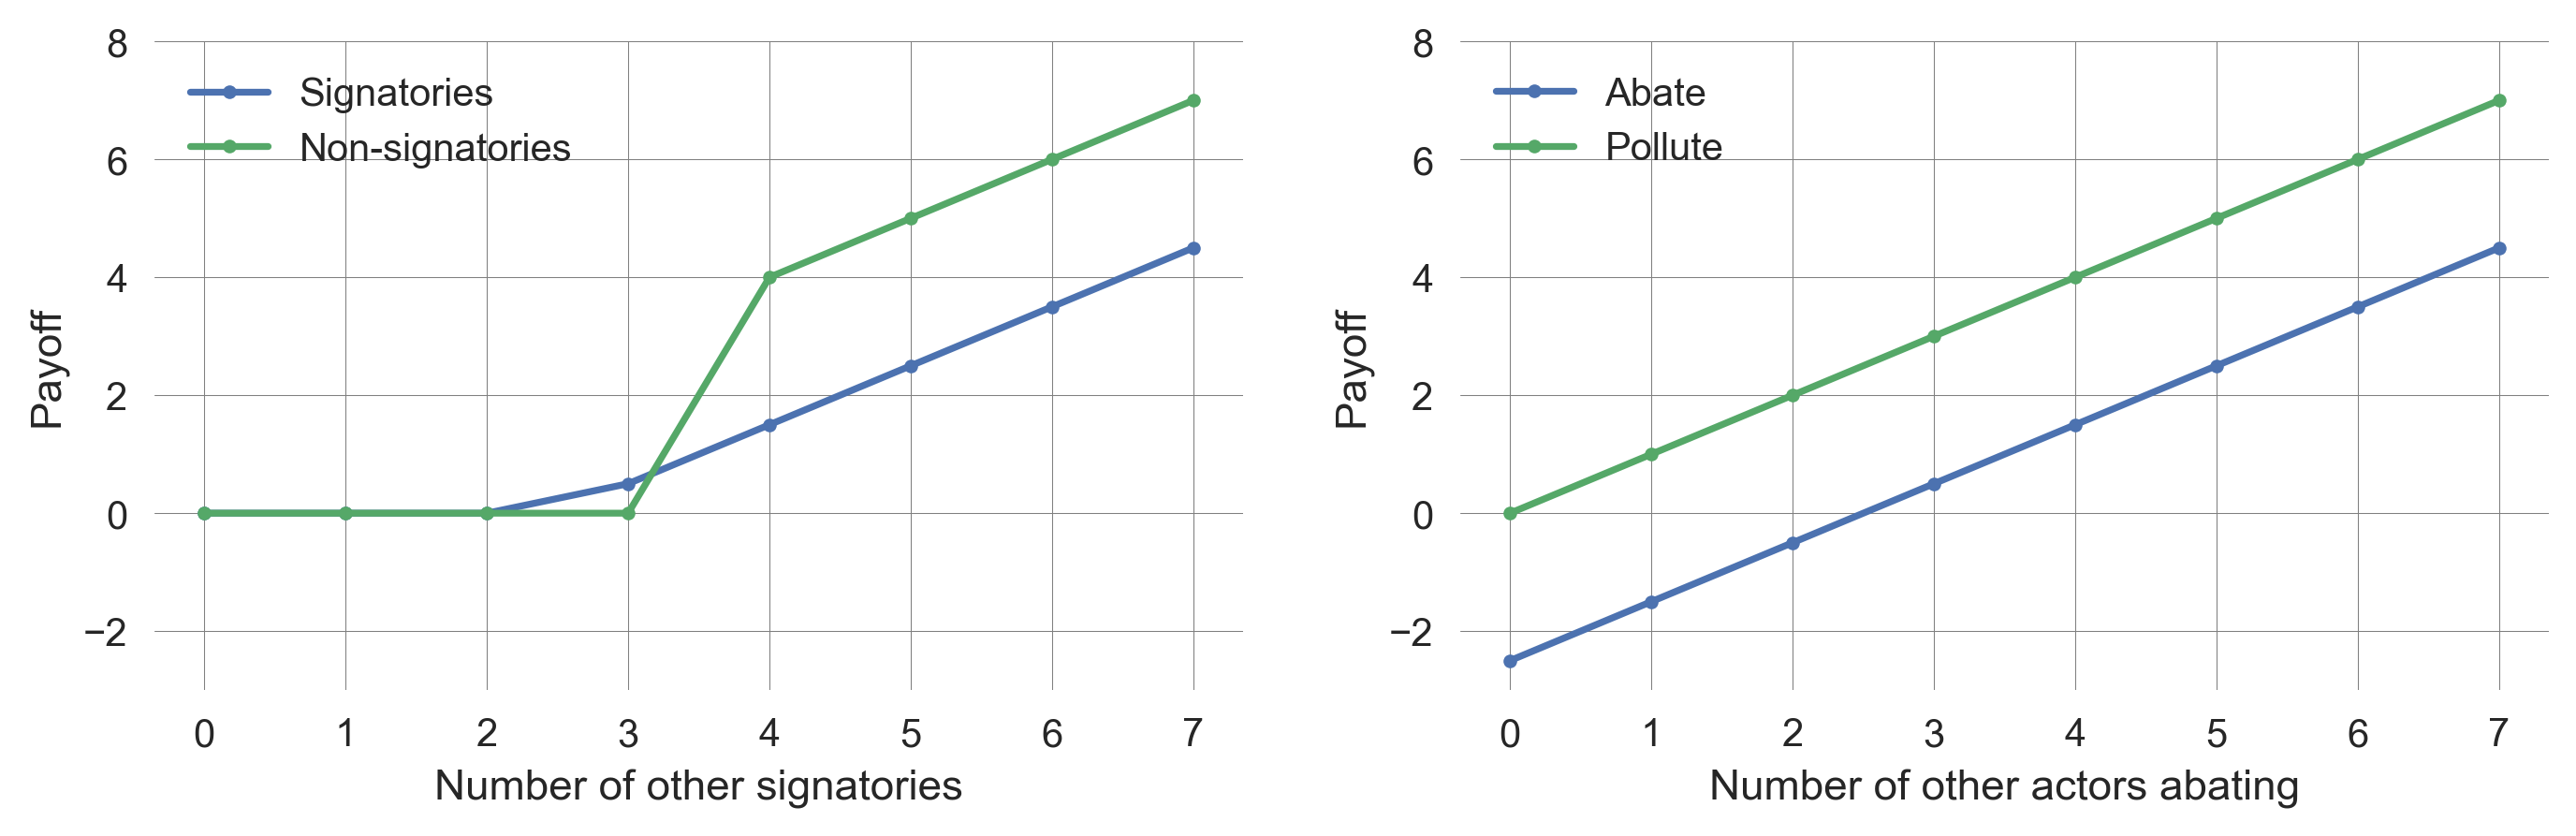

In [15]:
fig, axs = plt.subplots(1,2, figsize=(11,3))
plot_agreement_payoffs(8, 1, 3.5, ax=axs[0]); axs[0].set_ylim(-3,8)
plot_payoffs(8, 1, 3.5, ax=axs[1]); axs[1].set_ylim(-3,8);

## Threshold Public Goods

**Is the tragedy dilemma the game we are playing?**

![Climate tipping risks](images/02.02-ClimateTippingRisks.png){#fig-climate-tipping-risks}

#### Let's play again

* You are given two choices: **abate** climate change or continue to **pollute** the atmosphere.
* You gain 100 Euros (of averated damages) for each person that chooses *abate*.
* If you choose *abate*, you must pay 250 Euros.
* If not all choose to *abate*, the climate will tip, and everybody will lose 350 Euros.

What would you choose?

::: {.content-visible when-format="html"}

In [16]:
#| echo: false
iframe("https://ars.particify.de/p/57584395/series/03.02-05-ThresholdGame/1")

:::

### Threshold dilemma game

In general, we can model a threshold public goods game as follows:

* There are $N$-actors.
* Each actor can contribute an amount $c$ (by *abating*) to the public good, or they contribute nothing and *pollute*.
* Each contributed unit brings a benefit $b_u$ (of averted linear damages) to all actors.
* If the collective does not contribute at least a critical threshold amount $T_\text{crit}$, all actors experience a *catastrophic* impact $m$ of non-linear tipping damages.

**How does the threshold dilemma map onto the tragedy dilemma?**
For simplicity, let's assume actors have two actions:

* Contributing a fair amount to avert the collapse, $c=T_\text{crit}/N$
* Contributing nothing.

The unit benefit $b_u$ relates to a benefit $b$ from abating from the tragedy dilemma by
$$b=b_u c = b_u T_\text{crit}/N$$

In [17]:
def plot_threshold_payoff(N, bu, Tc, m, ax=None):
    c=Tc/N; b=bu*c
    
    Na_other = np.arange(0, N)
    bA = (Na_other+1)*b - c - m*(Na_other+1<N)
    bP = Na_other*b - m*(Na_other<N)

    _, a = plt.subplots() if ax is None else (None, ax)
    a.plot(Na_other, bA, '.-', label='Abate')
    a.plot(Na_other, bP, '.-', label='Pollute')
    a.legend(); a.set_xlabel('Number of other actors abating'); a.set_ylabel('Payoff')

**Contribution thresholds turn tragedy into coordination challenge** (@fig-threshold-payoffs).

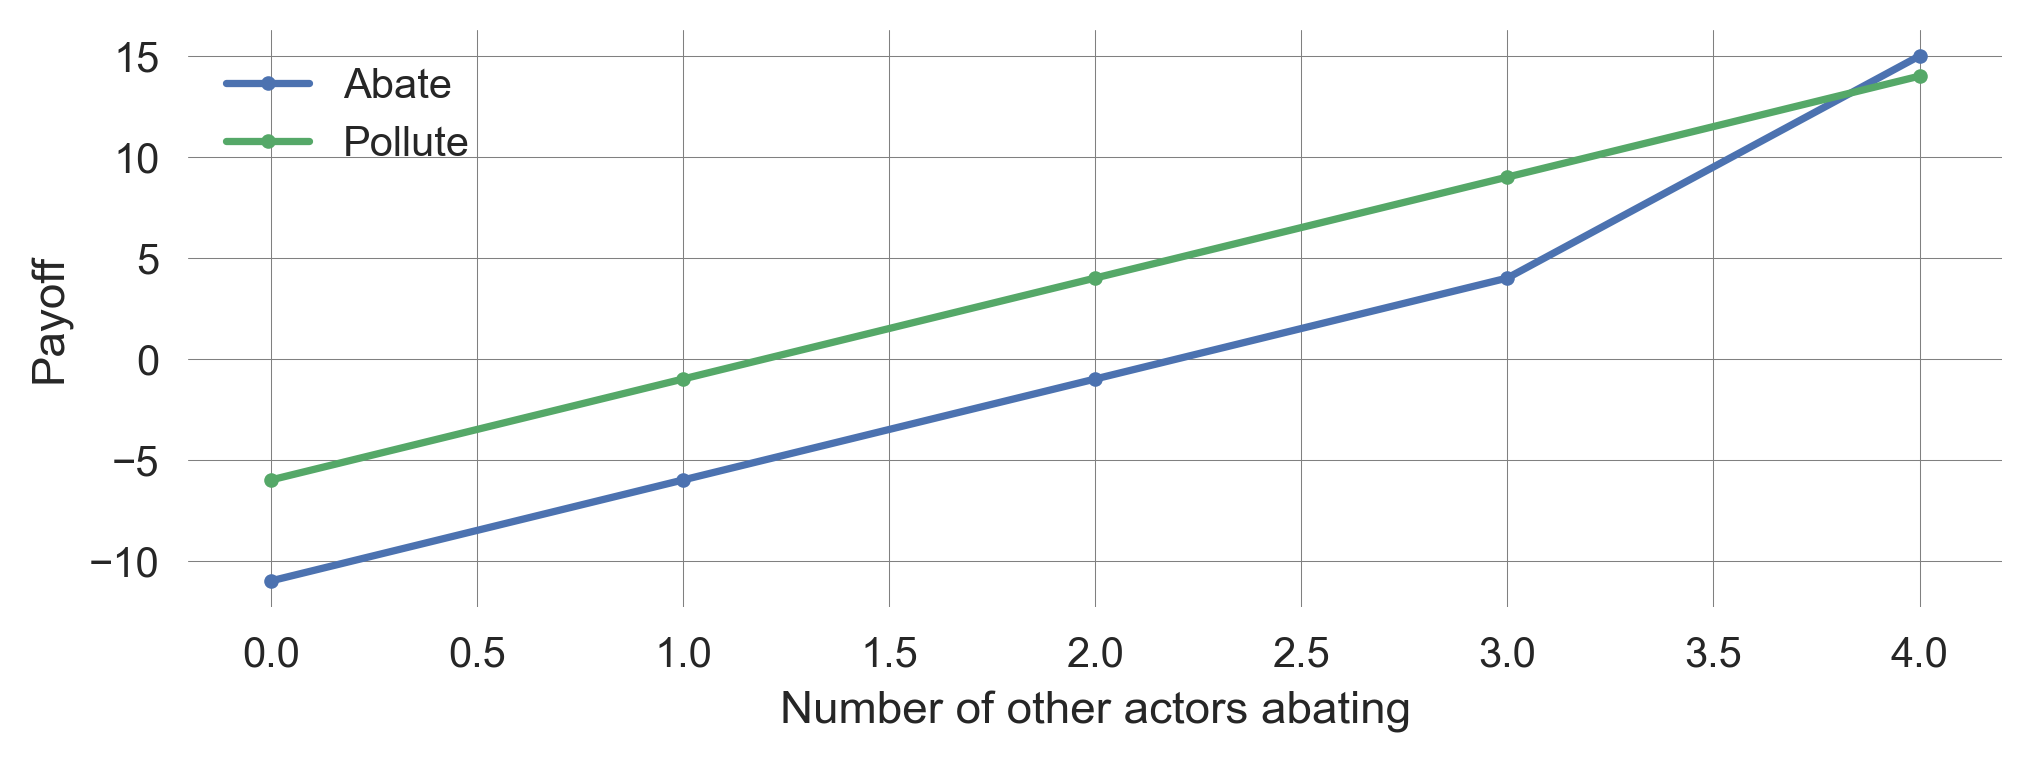

In [18]:
#| label: fig-threshold-payoffs
#| fig-cap: Payoffs from the thresholds game.
plot_threshold_payoff(5, 0.5, 50, 6);

Nations are good at solving coordination challenges via international conferences and agreements. The **Montreal Protocol** on Substances that Deplete the Ozone Layer is the landmark multilateral environmental agreement that regulates the production and consumption of nearly 100 artificial chemicals referred to as ozone-depleting substances (ODS). When released into the atmosphere, those chemicals damage the stratospheric ozone layer, Earth’s protective shield that protects humans and the environment from harmful levels of ultraviolet radiation from the sun. Adopted on 16 September 1987, the Protocol is, to date, one of the rare treaties to achieve universal ratification. [Source | [UNEP](https://www.unep.org/ozonaction/who-we-are/about-montreal-protocol)]

#### Conditions for coordination

Under what conditions on the parameters does a threshold turn a tragedy dilemma into a coordination challenge?

The benefit of a cooperating actor choosing to abate when all others choose to abate is
$$R^i(\mathsf{A, A}) = N b_u \frac{T_c}{N} - \frac{T_c}{N}  $$

In [19]:
def bAA(N, bu, Tc, m): return N*bu*Tc/N - Tc/N

The benefit of a *polluter*, when all others choose *abate* is
$$R^i(\mathsf{P, A}) = (N-1)b_u \frac{T_c}{N} - m$$

In [20]:
def bPA(N, bu, Tc, m): return (N-1)*bu*Tc/N - m

When all other actors *pollute*, there is no incentive to abate (because the collapse happens anyway).
But when all other actors *abate*, there is an incentive to *abate* if

$$R^i(\mathsf{A,A}) > R^i(\mathsf{P, A}).$$

Rearranging yields, $$m^* = \frac{1-b_u}{N} T^*_c.$$

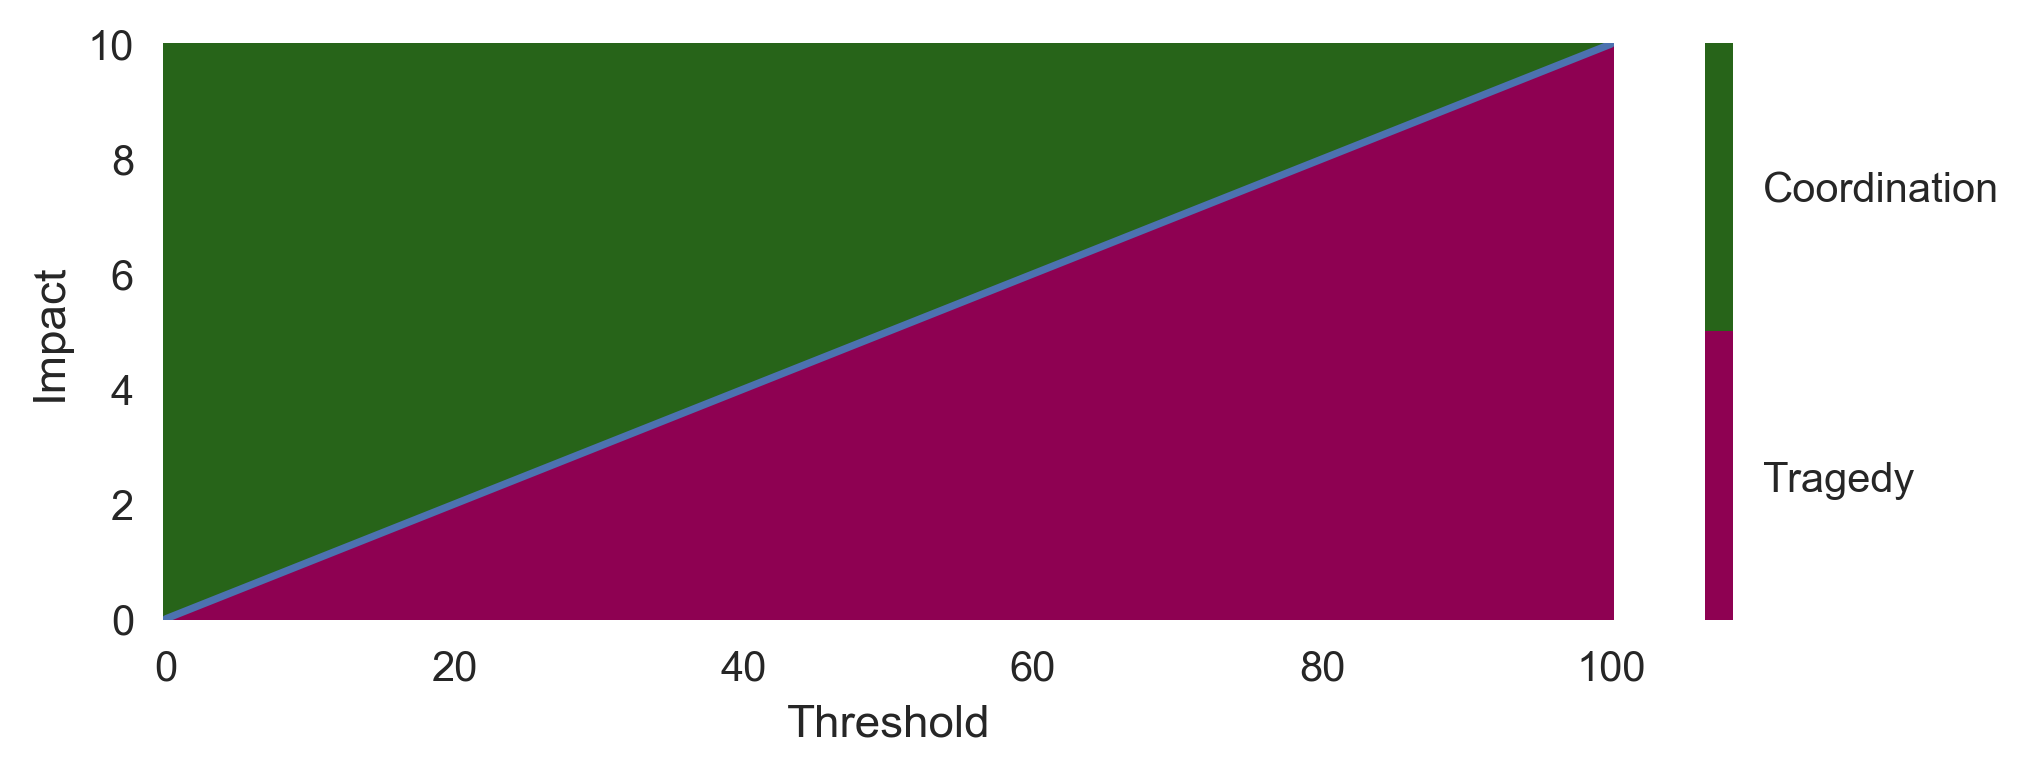

In [21]:
# Parameters
bu=0.5; N = 5

# Varying parameters  
ms = np.linspace(0, 10, 201); 
Ts = np.linspace(0, 100, 251);
TT, MM = np.meshgrid(Ts, ms)

# Get the plot nice
cmap = plt.colormaps['PiYG'];
norm = BoundaryNorm([0,0.5,1], ncolors=cmap.N, clip=True)

# do the plot
cb = plt.pcolormesh(TT, MM, bAA(N, bu, TT, MM)>bPA(N, bu, TT, MM), cmap=cmap, norm=norm)

# make the plot nice (again)
cbar = plt.colorbar(cb, ticks=[0.25, 0.75]); 
cbar.ax.set_yticklabels(['Tragedy', 'Coordination'])

plt.xlabel('Threshold'); plt.ylabel('Impact');
plt.plot(Ts, Ts/N*(1-bu));

### Uncertainty

What if there is uncertainty? We will consider two kinds of uncertainty:

* Impact uncertainty: We don't know exactly how bad it is going to be
* Threshold uncertainty: We don't know exactly where the threshold lies

#### Impact uncertainty

Assume the impact $m$ is uncertain.

The impact $m$ is distributed according to a probability distribution.

Expected value theory underlying game theory suggests that decision-makers will only care about the expected value.

Thus, as long as $m_\text{certain} = \mathbb E[m_\text{uncertain}]$, the model remains unchanged.

Here, we consider a very simple distribution of $Pr(m)$. There is a $1/3$ chance of a small impact $m_\text{certain} - \Delta m$, a $1/3$ chance of a medium impact $m=m_\text{certain}$, and a $1/3$ chance of a large impact $m=m_\text{certain} + \Delta m$. Obviously, the expected value is $m_\text{certain}$.

In [22]:
def plot_uncertainimpacts_payoffs(N, bu, Tc, m, delta_m=2, ax=None):
    c=Tc/N; b=bu*c;
    
    Na_other_fair = np.arange(0, N)

    bPl = Na_other_fair*b - (m-delta_m)*(Na_other_fair<N)
    bPc = Na_other_fair*b - m*(Na_other_fair<N)
    bPh = Na_other_fair*b - (m+delta_m)*(Na_other_fair<N)
    
    bAl = (Na_other_fair+1)*b - c - (m-2)*(Na_other_fair+1<N)
    bAc = (Na_other_fair+1)*b - c - m*(Na_other_fair+1<N)
    bAh = (Na_other_fair+1)*b - c - (m+2)*(Na_other_fair+1<N)
    
    bP = np.mean([bPl, bPc, bPh], axis=0)
    bA = np.mean([bAl, bAc, bAh], axis=0)
        
    _, a = plt.subplots() if ax is None else (None, ax)

    col1 = plt.rcParams['axes.prop_cycle'].by_key()['color'][0] 
    col2 = plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
     
    a.plot(Na_other_fair, bAc, '.-', color=col1, alpha=0.5)
    a.plot(Na_other_fair, bAl, '.--', color=col1, alpha=0.5)
    a.plot(Na_other_fair, bAh, '.-.', color=col1, alpha=0.5)
    
    a.plot(Na_other_fair, bPc, '.-', color=col2, alpha=0.5)
    a.plot(Na_other_fair, bPl, '.--', color=col2, alpha=0.5)
    a.plot(Na_other_fair, bPh, '.-.', color=col2, alpha=0.5)

    a.plot(Na_other_fair, bA, '.-', label='Average abate', color=col1)
    a.plot(Na_other_fair, bP, '.-', label='Average pollute', color=col2)

    a.set_xlabel('Number of other actors abating'); a.set_ylabel('Payoffs')
    a.legend()

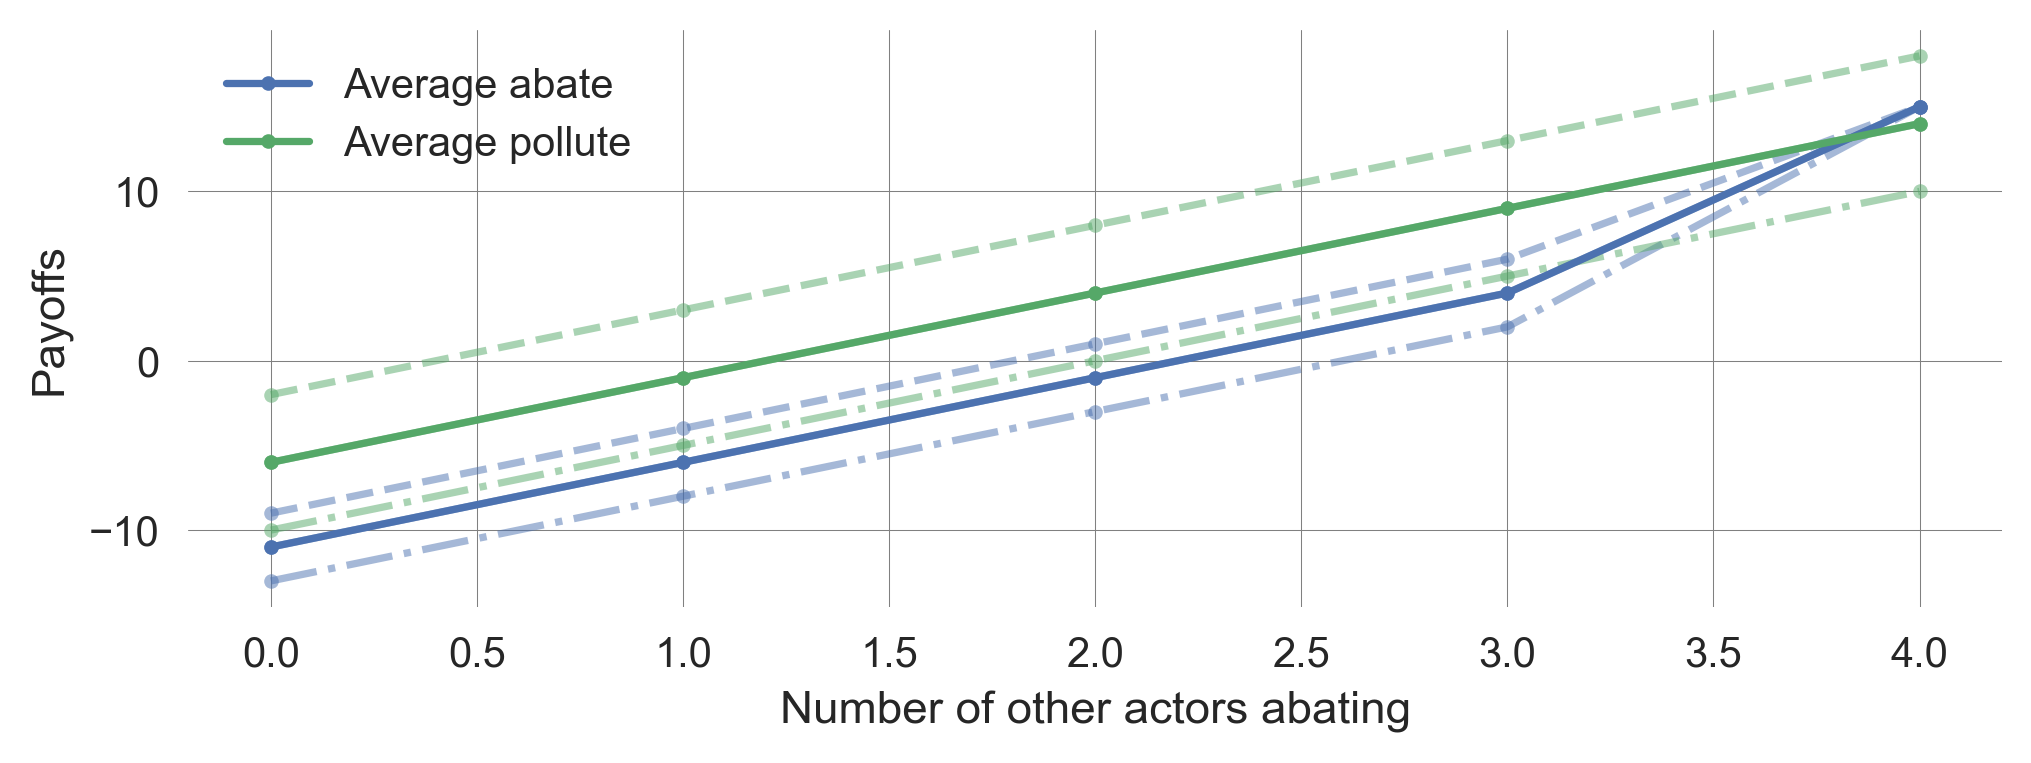

In [23]:
plot_uncertainimpacts_payoffs(N=5, bu=0.5, Tc=50, m=6, delta_m=4)

Thus, impact uncertainty does not change the outcome of our model.

#### Threshold uncertainty

Empirically, there is considerable uncertainty about the critical threshold $T_\text{crit}$ (@fig-climate-tipping-risks).

::: {.content-hidden unless-profile="interactive"}

![Climate tipping risks](images/02.02-ClimateTippingRisks.png)

:::

Suppose, the threshold $T_\text{crit}$ is uncertain:

* with $p=1/3$ it is at $T_\text{crit,low} = T_\text{crit,certain} - 10$
* with $p=1/3$ it is at $T_\text{crit,mid} = T_\text{crit,certain}$
* with $p=1/3$ it is at $T_\text{crit,high} = T_\text{crit,certain} + 10$

Thus, expected value of the threshold remains the same.



In [24]:
def plot_uncertainthresholds_payoff(N, bu, Tc, m, ax=None):
    c=Tc/N; b=bu*c
    
    Na_other_fair = np.arange(0, N)

    bD = Na_other_fair*b - m*(Na_other_fair<N)
    
    bC = (Na_other_fair+1)*b - c - m*(Na_other_fair+1<N)
    bL = (Na_other_fair+1)*b - c - m*(Na_other_fair+1<N)    
    bH = (Na_other_fair+1)*b - c - m*(Na_other_fair<N)    
    
    bA = np.mean([bC, bL, bH], axis=0)

    _, a = plt.subplots() if ax is None else (None, ax)
    a.plot(Na_other_fair, bA, '.-', label='Average abate')
    a.plot(Na_other_fair, bD, '.-', label='Pollute')
    a.plot(Na_other_fair, bC, '.-', label='Abate - Center threshold', color='grey')
    a.plot(Na_other_fair, bL, '.--', label='Abate - Low threshold', color='black')
    a.plot(Na_other_fair, bH, '.-.', label='Abate - High threshold', color='lightgrey')
    
    a.legend(); a.set_xlabel('Number of other actors abating'); a.set_ylabel('Payoff')

**Threshold uncertainty reverts the coordination challenge back to a tragedy**

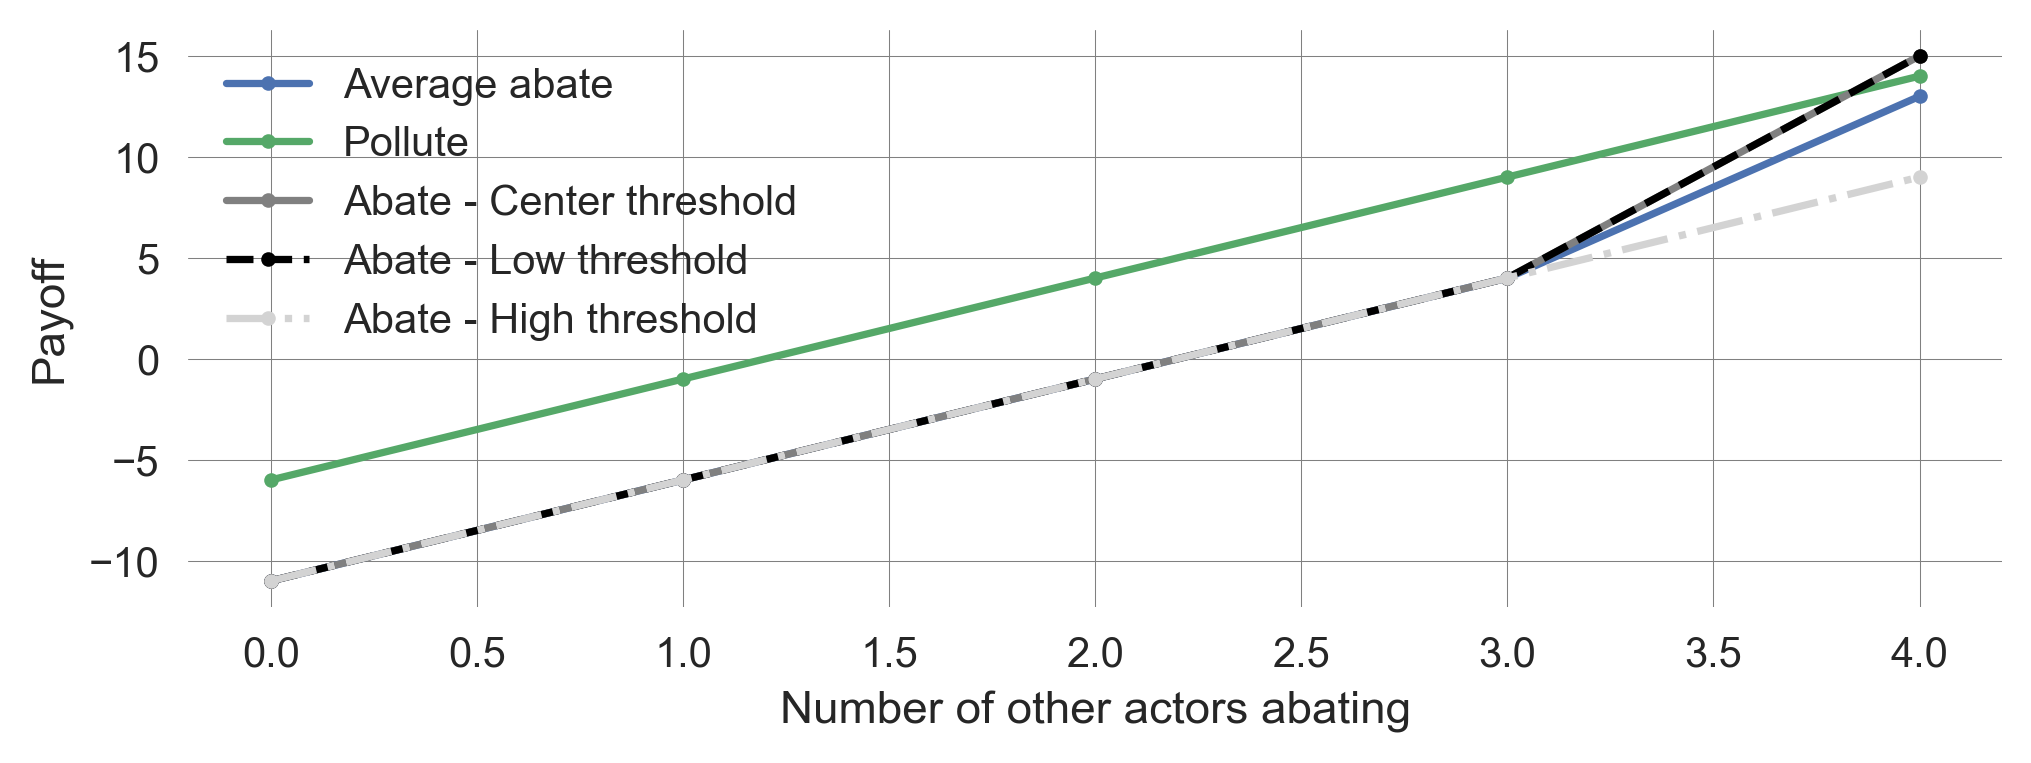

In [25]:
plot_uncertainthresholds_payoff(N=5, bu=0.5, Tc=50, m=6)

Threshold uncertainty raises the cost of averting collapse. Essentially, this is **because low thresholds cannot compensate for high thresholds**. High thresholds cause collapse, making actors worse off than those with medium thresholds. However, low thresholds cannot make actors better off than medium thresholds.

#### Threshold dilemmas summary

Contribution thresholds can turn tragedy into a coordination challenge - given a sufficiently severe collapse impact and sufficiently low threshold.

**Uncertainty is important**: Impact uncertainty has no effect - But threshold uncertainty can revert the coordination challenge back to tragedy.

#### Experimental evidence

Our model allows us to make **predictions** about how actors behave in threshold public goods games across the four (two by two) treatments of uncertainty: 

1) **Impact uncertainty has no effect**. Certainty and Impact uncertainty should yield the same behavior (abating), just as Threshold uncertainty and Threshold+Impact uncertainty should yield the same behavior (polluting).
2) **Threshold uncertainty has an effect**. The certainty and impact uncertainty treatment should yield a different behavior than the treatments with threshold uncertainty.

Both hypotheses are confirmed by the experimental evidence (@fig-BarrettDannenberg2012) [@BarrettDannenberg2012].

![Experimental evidence on threshold public goods games](images/03.02-BarrettDannenberg.dio.png){#fig-BarrettDannenberg2012}


## Learning goals **revisited**

In this chapter,

we applied game theory to model multi-agent action situations.

We resolved games by defining and finding Nash equilibria.

We described and analyzed the dimensions of a social dilemma.

We introduced and analyzed two special kinds of games: *agreement games* and *threshold public goods*.

* Agreement games can turn tragedies into divergence dilemmas.
* Threshold public goods can turn tragedies into coordination challenges - given enough certainty about where the threshold lies.

### Overall limitations

Our equilibrium game-theoretic model left it **unclear where the strategies come from** or from which process they arise.

The models in this chapter did **not explicitly consider environmental dynamics**.

The **consequences** for the actors were assumed to be **experienced immediately**.

### Bibliographic remarks

The fear and greed dimensions of a social dilemma are inspired by [@MacyFlache2002].

The name of the four social dilemma types is inspired by [@OstromEtAl2002], who talks about the *drama of the commons*. Commons may sometimes be a *tragedy*, sometimes a *comedy*, often something in between.

International environmental agreement games are coined by [@Barrett1994; @Barrett2005]. 



::: {.content-hidden unless-profile="standalone"}

## References

:::

::: {.content-hidden unless-profile="housekeeping"}

## Housekeeping

With the following cells, we can convert this notebook into slides and a PDF handout. If you work with this notebook interactively, you can ignore them.

In [26]:
# !jupyter nbconvert 03.02-StrategicInteractions.ipynb --to slides --embed-images --output-dir "./__slides"

---
metadata-files: [_standalone-quarto.yml]
---

In [27]:
#| output: false 
!cp 03.02-StrategicInteractions.ipynb 03.02-StrategicInteractions_.ipynb
!quarto render 03.02-StrategicInteractions_.ipynb --to pdf --profile standalone
!mv 03.02-StrategicInteractions_.pdf __scripts/03.02-StrategicInteractions.pdf
!rm -r 03.02-StrategicInteractions_*

pandoc 
  to: latex
  output-file: 03.02-StrategicInteractions_.tex
  standalone: true
  pdf-engine: xelatex
  variables:
    graphics: true
    tables: true
    secnumdepth: 2
  default-image-extension: pdf
  metadata-files:
    - _standalone-quarto.yml
  toc-depth: 2
  
metadata
  documentclass: scrartcl
  classoption:
    - DIV=11
    - numbers=noendperiod
  papersize: A4
  header-includes:
    - '\KOMAoption{captions}{tableheading}'
  block-headings: false
  title: Strategic Interactions
  bibliography:
    - CSMofHEI.bib
  geometry:
    - top=20mm
    - left=20mm
    - right=20mm
    - bottom=25mm
  link-citations: true
  number-depth: 2
  

Rendering PDF
running xelatex - 1
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering extended mode
  
running xelatex - 2
  This is XeTeX, Version 3.14159265-2.6-0.999992 (TeX Live 2020) (preloaded format=xelatex)
   restricted \write18 enabled.
  entering exte

:::